In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

In [ ]:
# Görselleri yükleyelim
image1_path = "/content/Ekran görüntüsü 2025-07-24 140404.png"
image2_path = "/content/Ekran görüntüsü 2025-07-24 140339.png"

In [ ]:
img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

In [ ]:
# Görselleri aynı boyuta getirdim
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

In [ ]:
# Renkleri RGB'ye çevirdim
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [ ]:
# Mutlak fark aldım (basit değişiklik tespiti için)
diff = cv2.absdiff(img1, img2)

In [ ]:
# Grayscale'e çevirdim
gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

In [ ]:
_, thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

In [ ]:
# Küçük gürültüleri temizledim
kernel = np.ones((5,5), np.uint8)
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

In [ ]:
# Kontur bulma ve değişiklik alanlarını işaretleme
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = img2_rgb.copy()
cv2.drawContours(output, contours, -1, (255, 0, 0), 2)

array([[[144, 115, 115],
        [156, 120, 119],
        [169, 129, 129],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[149, 116, 116],
        [164, 128, 127],
        [187, 146, 144],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[157, 120, 121],
        [178, 140, 140],
        [205, 164, 162],
        ...,
        [202, 194, 188],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

(np.float64(-0.5), np.float64(1326.5), np.float64(806.5), np.float64(-0.5))

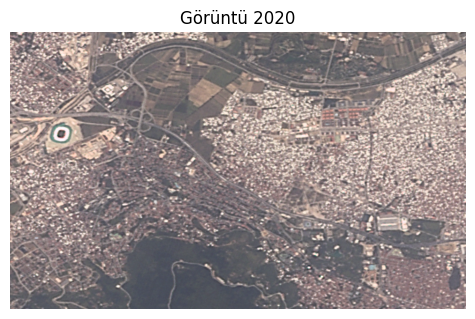

In [ ]:
# Görselleri göster
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.title("Görüntü 2020")
plt.imshow(img1_rgb)
plt.axis("off")

(np.float64(-0.5), np.float64(1326.5), np.float64(806.5), np.float64(-0.5))

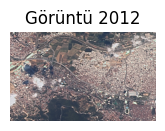

In [ ]:
plt.subplot(1, 3, 2)
plt.title("Görüntü 2012")
plt.imshow(img2_rgb)
plt.axis("off")


(np.float64(-0.5), np.float64(1326.5), np.float64(806.5), np.float64(-0.5))

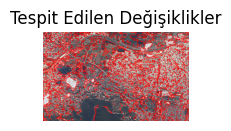

In [ ]:
plt.subplot(1, 3, 3)
plt.title("Tespit Edilen Değişiklikler")
plt.imshow(output)
plt.axis("off")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

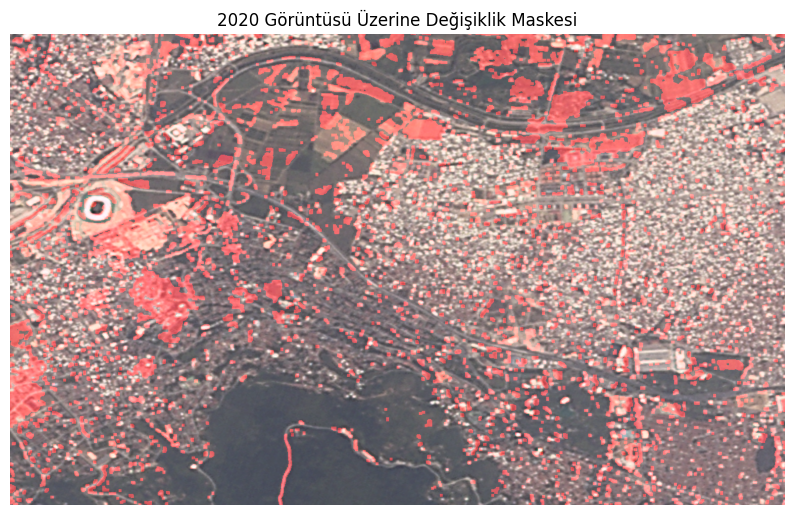

In [ ]:
# Kırmızı maske oluşturma (aynı boyutta)
red_mask = np.zeros_like(img1_rgb)
red_mask[:, :, 0] = cleaned  # sadece kırmızı kanalı

# Bindirme (alpha blending)
overlay = cv2.addWeighted(img1_rgb, 1, red_mask, 0.5, 0)

# Görseli göster
plt.figure(figsize=(10, 10))
plt.title("2020 Görüntüsü Üzerine Değişiklik Maskesi")
plt.imshow(overlay)
plt.axis("off")
plt.show()


In [ ]:
# 1. Değişiklik bölgesi sayısı
num_changes = len(contours)
print(f"Toplam değişiklik bölgesi sayısı: {num_changes}")

# 2. Her bir bölgenin alanını hesapladım
areas = [cv2.contourArea(cnt) for cnt in contours]
total_area = sum(areas)

print(f"Toplam değişiklik alanı (piksel cinsinden): {total_area:.2f}")
print(f"Ortalama değişiklik alanı: {np.mean(areas):.2f}")
print(f"En büyük değişiklik alanı: {np.max(areas):.2f}")
print(f"En küçük değişiklik alanı: {np.min(areas):.2f}")


Toplam değişiklik bölgesi sayısı: 2391
Toplam değişiklik alanı (piksel cinsinden): 214645.00
Ortalama değişiklik alanı: 89.77
En büyük değişiklik alanı: 11654.00
En küçük değişiklik alanı: 8.00
